In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

In [ ]:
file_path = 'financial_transactions.csv'
df_ft = pd.read_csv(file_path)
print(df_ft.head())

  transaction_id                        date  amount   category     merchant  \
0         T-1043  2024-08-26 14:40:08.881401  183.42  Utilities  Water Works   
1         T-1073  2024-08-26 14:40:08.881401  125.45  Groceries  Whole Foods   
2          T-501  2024-08-26 14:40:08.881401   83.94     Travel         Uber   
3           T-86  2024-08-26 14:40:08.881401   78.53   Shopping   Mall Store   
4         T-1004  2024-08-26 14:40:08.881401   59.15  Groceries       Costco   

   payment_method account_type transaction_type  \
0   Bank Transfer      Savings          Deposit   
1      Debit Card      Savings          Payment   
2  Mobile Payment   Investment          Payment   
3     Credit Card     Checking          Payment   
4   Bank Transfer     Checking         Transfer   

                                        description  
0  Defense late little he truth contain hear share.  
1            Certainly turn growth cell heavy live.  
2       Physical audience include majority natural

In [ ]:
# columns that have categorical breakdowns
breakdown_cols = ['category', 'merchant', 'payment_method', 'account_type', 'transaction_type']

# number of transactions for each categorical breakdown
for col in breakdown_cols:
    print(f"\nNumber of Transactions by {col}:")
    print(df_ft[col].value_counts(dropna=False))


Number of Transactions by category:
category
Shopping         169
Travel           134
Groceries        133
Entertainment    131
Subscriptions    129
Dining           125
Rent/Mortgage    106
Healthcare        99
Utilities         90
Other             84
Name: count, dtype: int64

Number of Transactions by merchant:
merchant
Miscellaneous     84
Mortgage Bank     62
Target            54
Netflix           47
Gym Membership    46
Amazon            46
Amazon Prime      45
Landlord          44
Concert Hall      38
Starbucks         38
Best Buy          38
Whole Foods       38
Walmart           37
Hilton            36
Dental Care       35
Gas Utility       35
Costco            34
Uber              34
Clinic            33
Delta             32
Airbnb            32
Pharmacy          31
Local Cafe        31
Mall Store        31
Spotify           30
Electric Co       29
AMC Theatres      28
Chipotle          28
McDonald's        28
Apple Music       26
Water Works       26
Trader Joe's      24


In [ ]:
# average dollar amount of transactions for each categorical breakdown
for col in breakdown_cols:
    print(f"\nTotal Amount of Transactions by {col}:")
    print(df_ft.groupby(col)['amount']
          .mean()
          .round(2)
          .sort_values(ascending=False))


Total Amount of Transactions by category:
category
Other            2707.04
Rent/Mortgage    1536.28
Travel            384.88
Shopping          269.81
Utilities         124.18
Healthcare        102.42
Groceries          81.10
Dining             25.72
Entertainment      16.03
Subscriptions      16.03
Name: amount, dtype: float64

Total Amount of Transactions by merchant:
merchant
Miscellaneous     2707.04
Mortgage Bank     1543.46
Landlord          1526.17
Uber               690.59
Hilton             417.28
Best Buy           294.43
Target             282.89
Amazon             258.61
Mall Store         233.48
Delta              205.44
Airbnb             203.03
Gas Utility        125.24
Water Works        124.91
Electric Co        122.25
Dental Care        108.29
Pharmacy           100.60
Clinic              97.89
Whole Foods         85.64
Costco              83.10
Walmart             80.27
Trader Joe's        72.39
Local Cafe          27.20
Starbucks           25.69
Chipotle           

The `category` with the highest average transaction amount is `Other`. We can plot a histogram to see the distribution of `Other` transaction amounts.

The transaction amount for the `category` of `Other` is equal to the transaction amount for `merchant` of `Miscellaneous`. It is safe to assume that whenever there is an `Other` in `category`, it would correspond to a `Miscellaneous` in `merchant`. However, because a lack of information relating to these transactions, these transactions should be put under tighter scrutiny.

Meanwhile other line items do not seem out-of-place. For example it is reasonable that average transaction amount for the `category` of `Rent/Mortgage` is $1536.28.

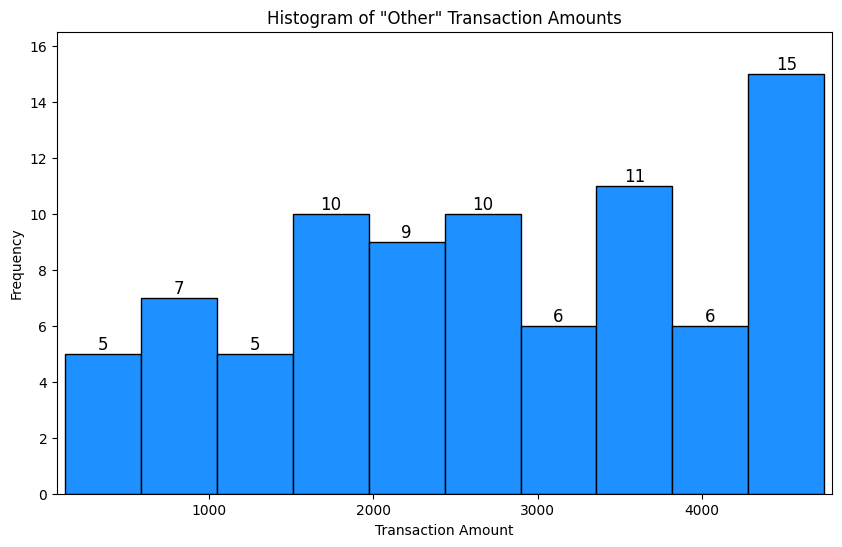

In [132]:
other_cat_df = df_ft[df_ft['category'] == "Other"]

plt.figure(figsize=(10,6))

# plot histogram
values, bins, bars = plt.hist(other_cat_df['amount'],
                              color="dodgerblue",
                              edgecolor="black")

plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Histogram of \"Other\" Transaction Amounts")
plt.bar_label(bars, fontsize=12, color='black')
plt.margins(x=0.01, y=0.1)
plt.show()

Most of the transactions in the `Other` `category` is more than $2,000, which are more than `Rent/Mortgage` transactions.

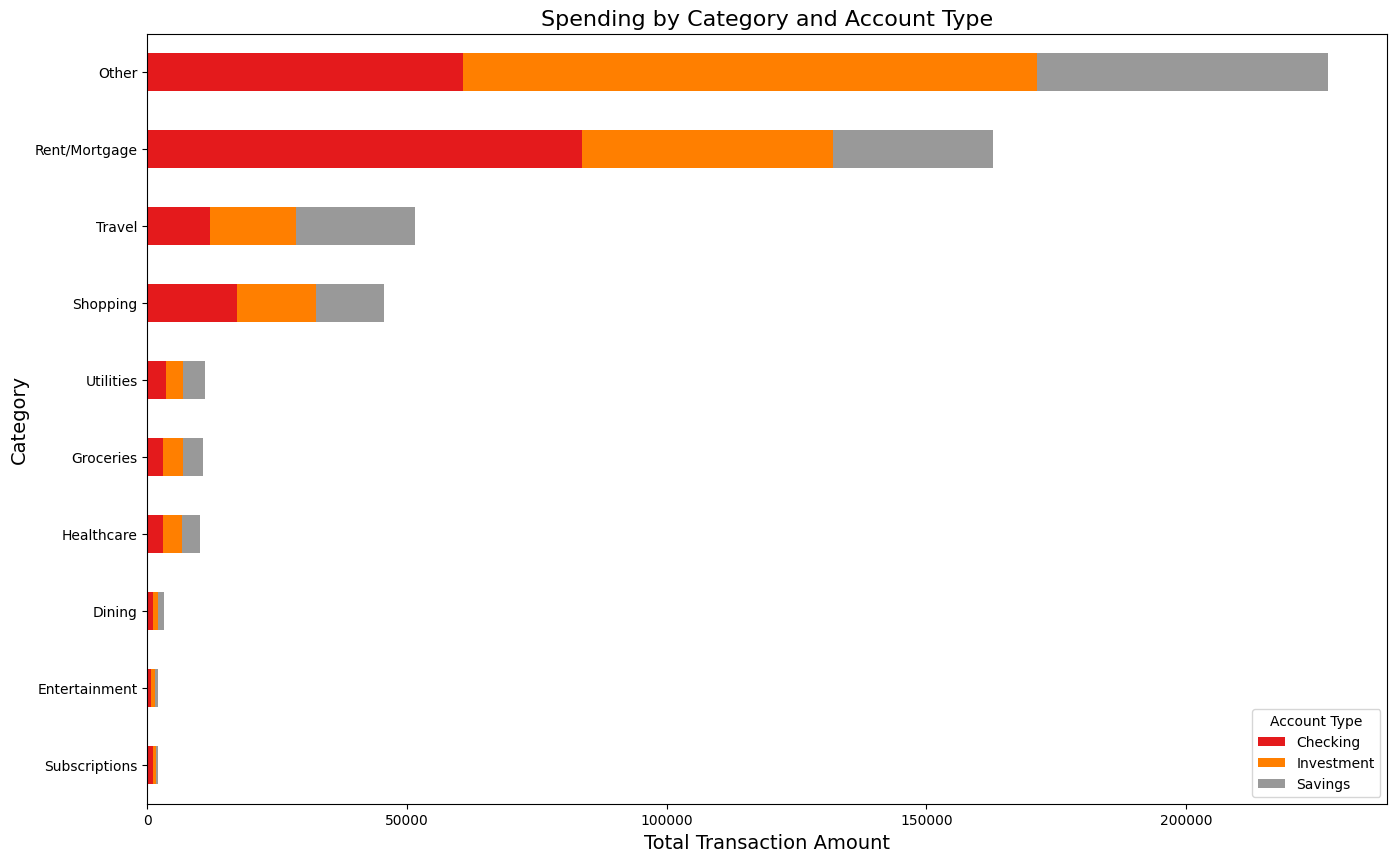

In [133]:
# create a pivot table of total amount spent by category and account type
cat_by_at = df_ft.pivot_table(
    index='category',
    columns='account_type',
    values='amount',
    aggfunc='sum'
)

pivot = cat_by_at.loc[cat_by_at.sum(axis=1)
                      .sort_values()
                      .index]

# plot stacked horizontal bar chart
pivot.plot(kind='barh',
           stacked=True,
           figsize=(16,10),
           colormap='Set1')

plt.xlabel("Total Transaction Amount", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.title("Spending by Category and Account Type", fontsize=16)
plt.legend(title="Account Type",loc='lower right')
plt.show()


In [80]:
other_payments = (
    df_ft[df_ft['category']=="Other"]
    .groupby('payment_method')['amount']
    .sum()
    .sort_values(ascending=False)
)

print("Total Amount of 'Other' by Payment Method:")
print(other_payments)


Total Amount of 'Other' by Payment Method:
payment_method
Mobile Payment    59077.78
Bank Transfer     47961.36
Cash              47252.69
Credit Card       41607.76
Debit Card        31491.63
Name: amount, dtype: float64


In [28]:
pd.crosstab(df_ft['merchant'], df_ft['category'])

category,Dining,Entertainment,Groceries,Healthcare,Other,Rent/Mortgage,Shopping,Subscriptions,Travel,Utilities
merchant,,,,,,,,,,
AMC Theatres,0,28,0,0,0,0,0,0,0,0
Airbnb,0,0,0,0,0,0,0,0,32,0
Amazon,0,0,0,0,0,0,46,0,0,0
Amazon Prime,0,0,0,0,0,0,0,45,0,0
Apple Music,0,0,0,0,0,0,0,26,0,0
Best Buy,0,0,0,0,0,0,38,0,0,0
Chipotle,28,0,0,0,0,0,0,0,0,0
Clinic,0,0,0,33,0,0,0,0,0,0
Concert Hall,0,38,0,0,0,0,0,0,0,0


Eyeballing the cross table, the categories of financial transactions are consistent with their corresponding merchants.